In [1]:
import math

from scipy.fftpack import fft, ifft, fftshift, ifftshift, fft2, fftfreq
import matplotlib.pylab as plt
import numpy as np
import pylab
import scipy.fftpack

In [2]:
def problem1():
    """
2) Write a short program to generate a sine (or cosine) function 2048 points long. 
Generate exactly 32 or 64 full cycles over this interval. 

Included in answer to problem2.

Notes:
1 cycle is 2*np.pi, so 32 cycles is T= 32*2*np.pi, or from (-16*2*np.pi, 16*2*np.pi)
"""

In [3]:
def problem2():
    """Take the Fourier transform of the function that you made in Exercise 1 using the 
    equivalent of Matlab's fft() function. Plot the real and imaginary parts of the 
    transform versus wavenumber. Take the inverse Fourier transform of your series. 
    Q. Do you get what you started with? 
    Q. What happens if you use an even function instead of an odd one (or vice versa)? 
    Label all your plots.
    
Helpful Hint: There is a function fftshift() that will shift the zero wavenumber to the center of the plot.
If there are nx points in your series, then the wavenumber should be k = -nx/2:nx/2-1."""
    

maximum 
sine


/Users/mlimb/.virtualenvs/rs/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


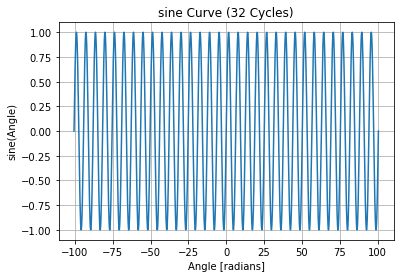

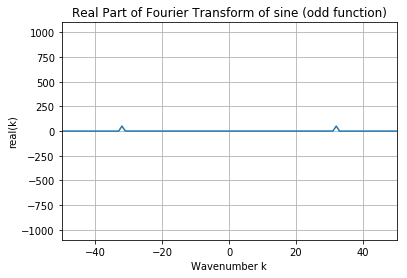

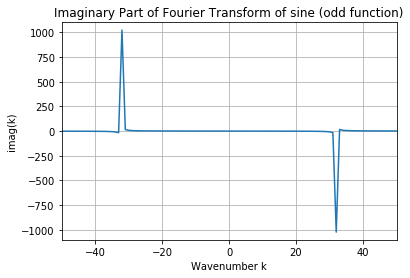

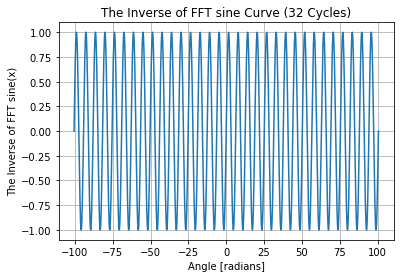

In [4]:
def label_axes(_plt, x_lab, y_lab, title):
    _plt.xlabel(x_lab)
    _plt.ylabel(y_lab)
    _plt.title(title)

    
def plot_fourier_transform(trig_type):
    fn_type = 'odd function' if trig_type is 'sine' else 'even function'

    x_range= np.linspace(-2*np.pi*16, 2*np.pi*16, 2048) #2048 points, 32 cycle
    y_range = np.sin(x_range) if trig_type is 'sine' else np.cos(x_range)
    
    nx = 2048
    k_range= np.linspace(-nx/2, nx/2-1, nx)
    
    # a) Plot regular trig 
    plt.figure(1)
    plt.grid()
    plt.plot(x_range, y_range)
    label_axes(plt, 'Angle [radians]', 
               '{0}(Angle)'.format(trig_type), 
               '{0} Curve (32 Cycles)'.format(trig_type))
    
    # Calculate fft of a trig function (sine or cosine)
    fft_trig = fft(y_range)
    
    # fftshift to make it displayable
    transformed_trig = fftshift(fft_trig)
 
    # b) Plot the real part of fft trif
    real_trig= transformed_trig.real
    plt.figure(2)
    plt.xlim(-50,50)
    plt.ylim(-1100,1100)

    plt.plot(k_range, real_trig)
    label_axes(plt, 'Wavenumber k', 
               'real(k)', 
               'Real Part of Fourier Transform of {0} ({1})'.format(
                   trig_type, fn_type))
    plt.grid()
    
    # c) Plot the imaginary part of fft trig
    imag_trig = transformed_trig.imag
    plt.figure(3)
    plt.xlim(-50,50)# <- to verify peaks at -32 and 32
    plt.ylim(-1100,1100)
    plt.plot(k_range, imag_trig)
    label_axes(plt, 'Wavenumber k', 
               'imag(k)', 
               'Imaginary Part of Fourier Transform of {0} ({1})'.format(  
                   trig_type, fn_type))
    plt.grid()
    
    print "maximum "
    print trig_type
    # d) Plot the inverse of fft sine
    plt.figure(4)
    yinv = ifft(fft_trig)
    plt.plot(x_range, yinv)
    label_axes(plt, 'Angle [radians]', 
               'The Inverse of FFT {0}(x)'.format(trig_type), 
               'The Inverse of FFT {0} Curve (32 Cycles)'.format(trig_type))
    plt.grid()
    plt.show()
    
plot_fourier_transform('sine')


maximum 
cosine


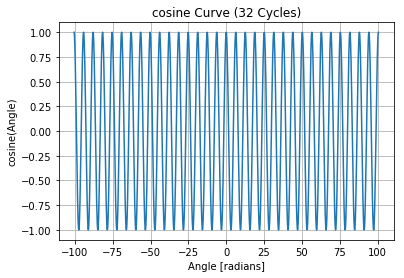

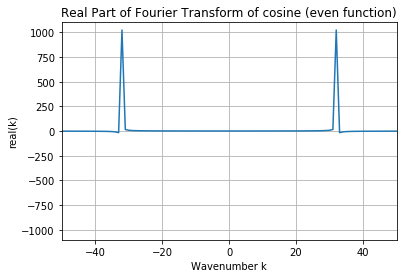

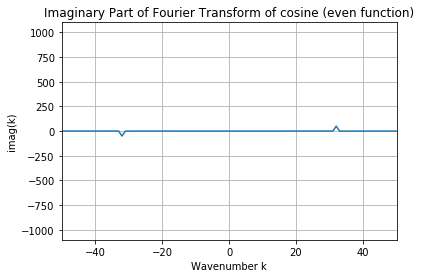

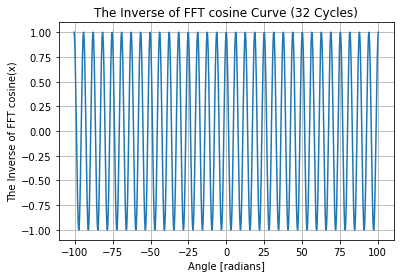

In [5]:
plot_fourier_transform('cosine')

In [6]:
def problem2_answers():
    """
Answers:

Take the inverse Fourier transform of your series. 
a) Do you get what you started with? YES!
b) What happens if you use an even function versus odd function?

Cosine has prominent peaks in the Real Part and Sine has prominent 
peaks in the Imaginary Part at x=-32 and x=32.

Cosine is an even function (f(x) = f(-x)) and sine is an odd function
(-f(x) = f(-x)). The real parts of FFT of either sine or cosine 
remains the same. The imaginary parts of FFT differ however.


function type |       real                  |   imaginary
-----------------------------------------------------------------------
 even/cosine  | two peaks                   | two tiny peaks 
              | real(k_peak) > 1000         | (- for -k and + for +k values)
--------------------------------------------------------------------------
 odd /sine    | two tiny peaks              | two peaks at k=+/-32 
              | (noise, real(k_peak) < 50 ) | imag(k_peak) > 1000
   
"""

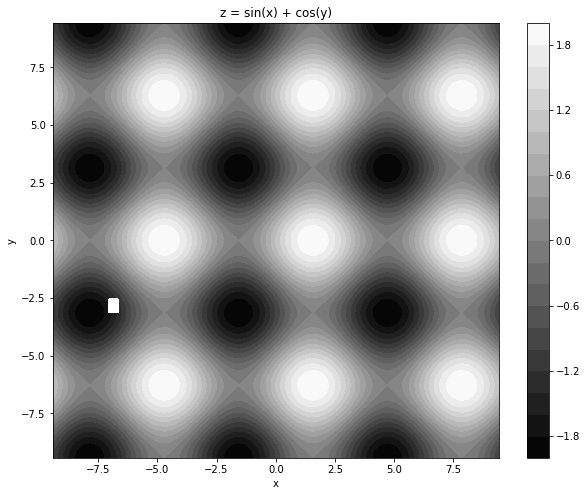

In [7]:
def problem3():
    """
    1) Create a 2-D array of numbers 400×300.  DONE
    2) Make it something interesting.  DONE
    3) Use the meshgrid() function to create the inputs. DONE
    4) Make an image of this function using imagesc() in greyscale. DONE
    5) Supply a colorbar and label the x- and y-axes. DONE
    6) Change the value of the array elements 100:110, 50:60 to
make something that will be visible in the image.  DONE
    7) Is the spot in the correct location? YES
"""  
nx, ny = 400, 300
x = np.linspace(-3*np.pi, 3*np.pi, nx)
y = np.linspace(-3*np.pi, 3*np.pi, ny)
[X, Y] = np.meshgrid(x, y)

Z = np.ma.array(np.sin(X) + np.cos(Y), mask=False)
Z.mask[100:110,50:60] = True 
# masking out the values at the positions 

plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z, 25, cmap=plt.cm.gray)

#initial try:
#Z = lambda x, y: np.sin(X) + np.cos(Y)
#plt.imshow(Z(X, Y), plt.cm.gray, extent=(-200, 199, 149, -150))
plt.colorbar()
label_axes(plt, 'x', 'y', 'z = sin(x) + cos(y)')
plt.show()

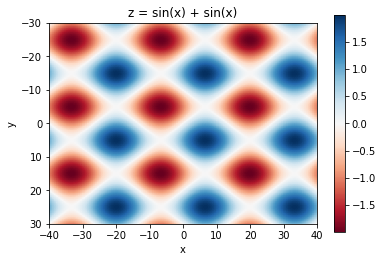

In [8]:
# For fun:
z1 = lambda x, y: (np.sin(x) + np.sin(y))
plt.imshow(z1(X, Y), plt.cm.RdBu, extent=(-40, 40, 30, -30))
plt.colorbar()
label_axes(plt, 'x', 'y', 'z = sin(x) + sin(x)')
plt.show()

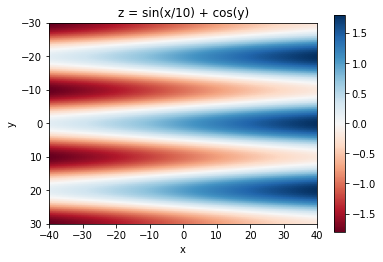

In [9]:
#For Fun2
z2 = lambda x, y: (np.sin(x/10) + np.cos(y))
plt.imshow(z2(X, Y), plt.cm.RdBu, extent=(-40, 40, 30, -30))
plt.colorbar()
label_axes(plt, 'x', 'y', 'z = sin(x/10) + cos(y)')
plt.show()

In [10]:
def problem4():
    """
    1) Generate an array of numbers 1024×1024 containing zeros. 
    2) Imbed a rectangular patch of ones in the array of zeros. 
        (Aperture)
    3) Take the Fourier transform and look at the amplitude (angular
resolution of aperture). 
    4) How does the angular resolution change as the size and shape of 
    the aperture are changed?
    5) Create your own aperture and look at its Fourier transform. Be creative!  
"""


In [11]:
# This way of making aperture is adopted from work by Bia Villas-Boas,
# a former SIO 236 student
# Link: https://github.com/biavillas/sio236

# initialize x and y
x = np.arange(1024)
y =  np.arange(1024)

# Aperture 1: square area 100 x 100
a1 = np.ma.zeros((1024,1024))
w = 50
h = 50 # dimension
n = 1024/2 - 1
a1[n-w:n+w,n-h:n+h] = 1  

# Aperture 2: rectangular area 600 x 100
a2 = np.ma.zeros((1024,1024))
w = 50
h = 300
n = 1024/2 - 1
a2[n-w:n+w,n-h:n+h] = 1

# Aperture 3: circle of area with radius 50
xx, yy = np.meshgrid(np.linspace(-512, 512, 1024),
                     np.linspace(-512, 512, 1024))
a3 = np.ma.zeros((1024,1024))
z = xx**2 + yy**2
circ = z<=np.pi*50*50 #area of a circle
a3[circ] = 1

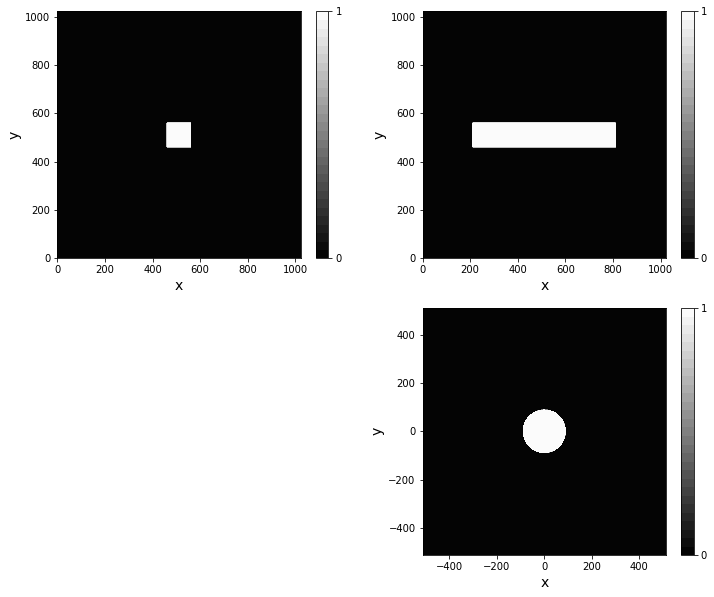

In [12]:
def set_labels(_plt):
    _plt.xlabel('x', fontsize=14)
    _plt.ylabel('y', fontsize=14)
    
#doesn't seem to be necessary
def set_limits(_plt):
    _plt.xlim([0,1024])
    _plt.ylim([0,1024])

def set_color_bar(_plt, *_orientation):
    cbar = _plt.colorbar()
    cbar.set_ticks([0,1])
    if _orientation is 'horizontal':
        _plt.colorbar(orientation='horizontal')
    
#set figure size
plt.figure(figsize=(12,10))

#config for contourf to divide color bar into 30 gradients
grad = np.linspace(0, 1., 30) 

#first plot
plt.subplot(221)
set_labels(plt)
plt.contourf(x, y, a1, grad, cmap=plt.cm.gray)
set_color_bar(plt)

#second plot
plt.subplot(222)
set_labels(plt)
plt.contourf(x, y, a2, grad, cmap=plt.cm.gray)
set_color_bar(plt)

#third plot
plt.subplot(224)
set_labels(plt)
plt.contourf(xx, yy, a3, grad, cmap=plt.cm.gray)
set_color_bar(plt)

plt.show()

In [13]:
# generate Discrete Fourier Transform sample frequencies
# window length=1024, d=spacing

def get_k():
    return fftshift(fftfreq(1024, d=1.0))

def calculate_fft(data):
    """
    data
    - 1024 by 1024 2D array of mostly 0's and some 1's (aperture)
    - a1, a2, or a3 defined above, depending on the aperture shape/size
    """
    # fftshift to make it displayable (focus the center)
    # abs to make it symmetric
    return np.abs(fftshift(fft2(data)))
    
# shift to make it displayable (focus the center)
# abs to make it symmetric
A1 = calculate_fft(a1)
A2 = calculate_fft(a2)
A3 = calculate_fft(a3)

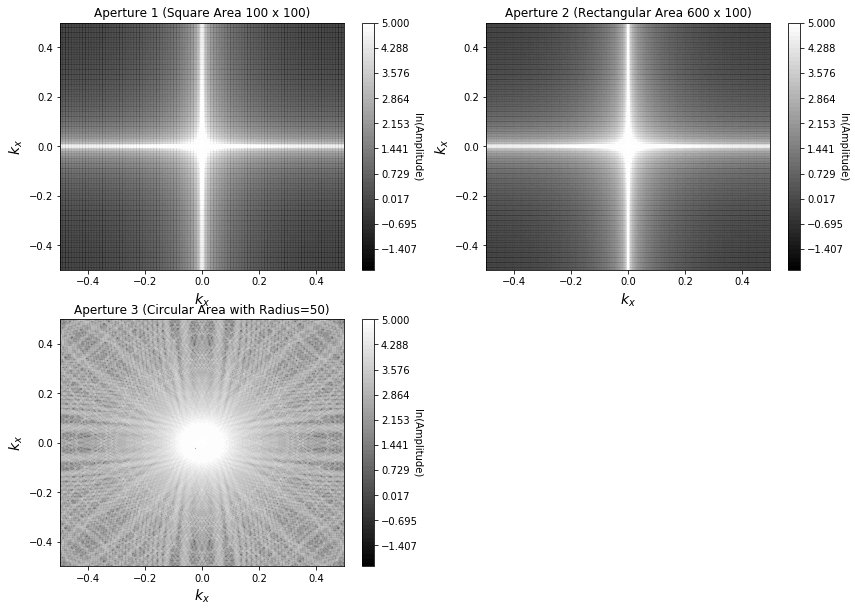

In [14]:
grad = np.linspace(-2, 5, 60)
plt.figure(figsize=(14,10))
k = get_k()

def set_k_labels(_plt, **kwargs):
    _plt.xlabel('$k_x$', fontsize=14)
    _plt.ylabel('$k_x$', fontsize=14)
    if 'title' in kwargs:
        _plt.title(kwargs['title'])
    
def set_amp_color_bar(_plt, **orientation):
    cbar = plt.colorbar()
    cbar.set_label('ln(Amplitude)', rotation=270)

# RuntimeWarning Being generated on 'divide by zero
# encounted in log.' This is numpy internal warning, 
# not python generic warning. For now use a quick and 
# dirty way to ignore these errors
# Reference: http://stackoverflow.com/questions/29950557/ignore-divide-by-0-warning-in-python
np.seterr(divide='ignore')

# using log scale to visualize z better
# first plot
plt.subplot(221)
plt.contourf(k, k, np.log(A1), grad, cmap=plt.cm.gray)
set_k_labels(plt, title='Aperture 1 (Square Area 100 x 100)')
set_amp_color_bar(plt)

# second plot 
plt.subplot(222)
plt.contourf(k, k, np.log(A2), grad, cmap=plt.cm.gray)
set_k_labels(plt, title='Aperture 2 (Rectangular Area 600 x 100)')
set_amp_color_bar(plt)
    
# third plot
plt.subplot(223)
plt.contourf(k, k, np.log(A3), grad, cmap=plt.cm.gray)
set_k_labels(plt, title='Aperture 3 (Circular Area with Radius=50)')
set_amp_color_bar(plt)

plt.show()

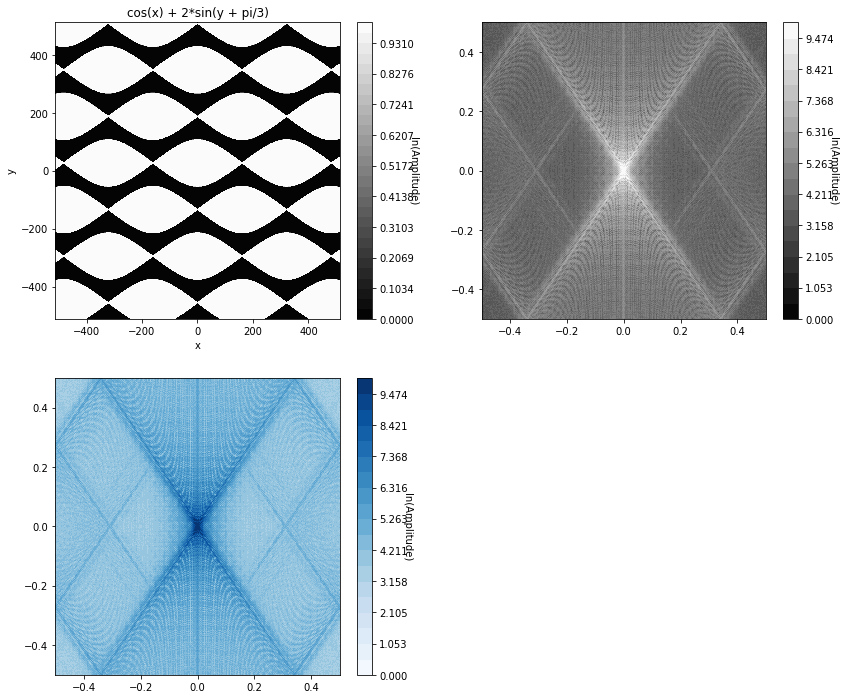

In [15]:
def problem5():
    """
    chose: cos(x) + 2*sin(y + pi/3)
    """
def generate_meshgrid():
    x = np.linspace(-10,10,1024) 
    y = np.linspace(-10,10,1024) 
    [X, Y] = np.meshgrid(x,y) 
    return [X, Y]

[X, Y] = generate_meshgrid()

z = np.ma.array(np.cos(X) + 2*np.sin(Y + np.pi/3),
                mask=False)

mask = abs(z) > 1
a = np.ma.zeros((1024,1024))
a[mask] = 1

k = get_k()
A = calculate_fft(a)

#initilize figure size
plt.figure(figsize=(14, 12))

# plot in x-y space
plt.subplot(221)
label_axes(plt, 'x', 'y', 'cos(x) + 2*sin(y + pi/3)')

plt.contourf(xx, yy, a, 
             np.linspace(0, 1., 30), 
             cmap=plt.cm.gray)
set_amp_color_bar(plt)

# plot in k-vector space
plt.subplot(222)

# take log to make the figure more visible 
# (distribution more condensed)
plt.contourf(k, k, np.log(A),
             np.linspace(0, 10, 20),
             cmap=plt.cm.gray)
set_amp_color_bar(plt)

# plot in k-vector space (colored)
plt.subplot(223)

# take log to make the figure more visible 
# (distribution more condensed)
plt.contourf(k, k, np.log(A),
             np.linspace(0, 10, 20),
             cmap=plt.cm.Blues)
set_amp_color_bar(plt)
plt.show()